## see learning pytorch - https://www.learnpytorch.io/03_pytorch_computer_vision/

## Computer Vision libraries in Pytorch



*   `torchvision` - base domain library for pytorch computer vision
*   `torchvision.datasets` - get datasets and data loeading functions for computer vision here
* `torchvision.models`- get pretraing computer vision models that you can leverage for your own problem.
* `torchvision.transformers`- functions for manipulating your vision data (images) suitable for use with an ML model.
* `torch.utils.data.Dataset`- Base dataset class for Pytorch
* `torch.utils.data.DataLoaders` - Creates a python iterable over a dataset



In [ ]:
# import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualisation
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


In [ ]:
# Setup traning & test dataset
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train = True, # do we want training dataset
    download = True, # do we want to download yes/no
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform=None, # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train = False, # do we want training dataset
    download = True, # do we want to download yes/no
    transform=ToTensor(), # how do we want to transform the data
    target_transform=None, # how do we want to transform the labels/targets
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 301kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.66MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.3MB/s]


In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

# Check input and output shapes

In [ ]:
# train_data shape
print(f"Image shape: {image.shape} -> [color_channel, height, width]")
print(f"Image_label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channel, height, width]
Image_label: Ankle boot


In [ ]:
# gray_scale gives 1 as color channel

# Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

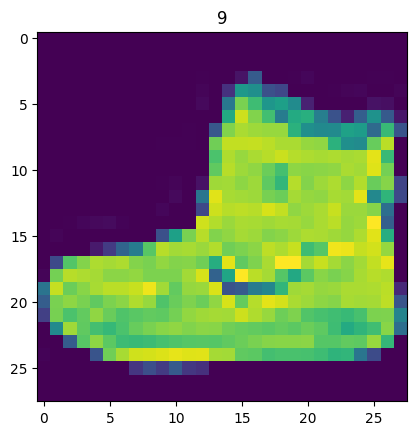

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # will remove the gray scale 1 parameter from shape as matplotlib does not need a value for grayscale shape
# and also as pytorch gives color channel at first, but matplotlib expects it at the last
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

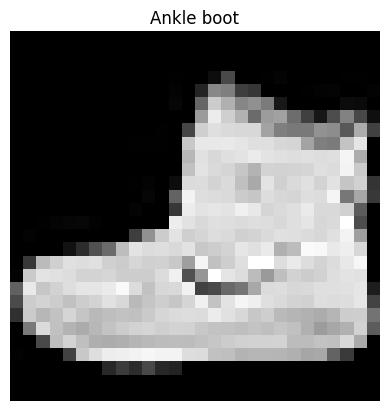

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

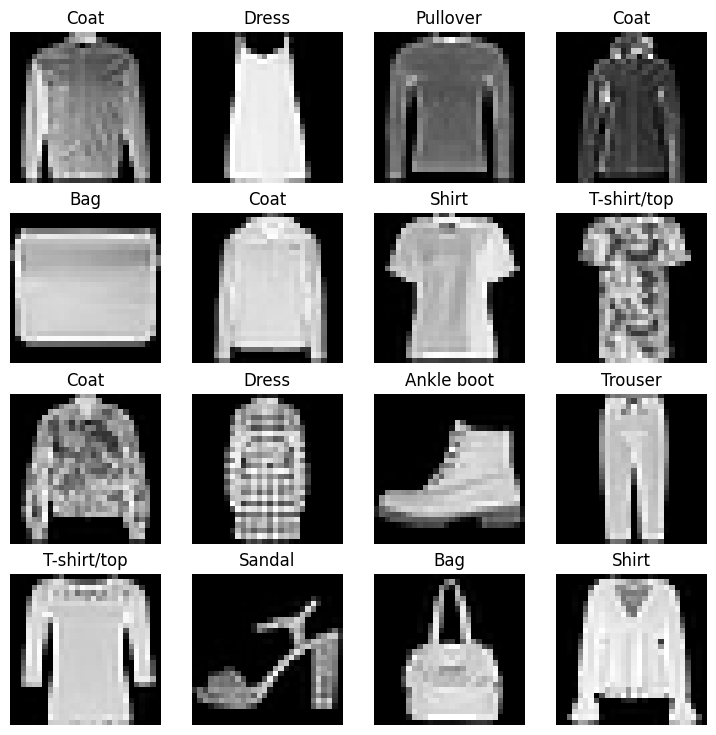

In [ ]:
# plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

# Right now , our data is in the form of pyTorch Dataset
# Dataloader turns our dataset into python iterable
# More specifically, we want to turn our data into batches (mini batches)
# Why would we do this ?
  

  *  It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit.So we breaj it down to 32 images at a time (batch size of 32)
  *  It gives our neural network more chances to update its gradient per epoch.

  Mini-Batch Gradient Descent involves calculating the error for each batch and updating the model parameters accordingly. The algorithm iteratively adjusts these parameters to minimize the overall error across all batches.

  for more on it, see here: How (and Why) to Use Mini-Batches in Neural Networks
YouTube · Mısra Turp
17 Nov 2022 [link text](https://)



In [ ]:
# Do you think these items of clothing (images) could be modelled with pure linear lines? or do you think we'll need non-linearity.


In [ ]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True
                              )
test_dataloader = DataLoader(dataset=test_data,
                              batch_size = BATCH_SIZE,
                              shuffle=False
                              )

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b319118d550>,
 <torch.utils.data.dataloader.DataLoader at 0x7b3191d29070>)

In [ ]:
# check out whats inside the train dataloader

train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
# Let's checkout what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b319118d550>, <torch.utils.data.dataloader.DataLoader object at 0x7b3191d29070>)


Img size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


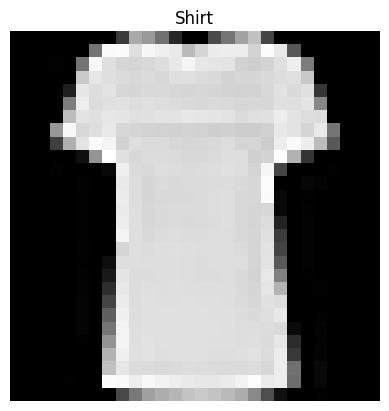

In [ ]:
# Show a sample from the batch
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Img size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

## Model 0: Build a Baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity as necessary.



In [ ]:
# creating a flatten layer

flatten_model = nn.Flatten()

# Get a single sample

x = train_features_batch[0]
x.shape

# Flatten the sample

output = flatten_model(x) # perform forward pass

# print out what happened
print(f'shape before flattening: {x.shape}')
print(f'shape after flattening: {output.shape}')

shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int
               ):
    super().__init__()

    self.layer_stack = nn.Sequential(

        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape
                  )

    )

  def forward(self,x):
      return self.layer_stack(x)


In [ ]:
# Setup model with input parameters
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape = 784,
    hidden_units = 10, # how many units in the hidden layer
    output_shape=len(class_names)
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## 3.1 setup loss, optimizer and evaluation metrics

Loss function - since we are working with multi-classification data, our loss function will be nn.CrossEntropyLoss()
Optimizer - our optimizer torch.optim.SGD() (stochastic gradient descent)
Evaluation metric - since we're working on classification problem, let's use accuracy as our evaluation metric

In [ ]:
import requests
from pathlib import Path

#Download helper function from Learn Pytorch repo
if Path('helper_function.py').is_file():
  print(f'helper_function.py already exists, skipping downlaod...' )
else:
  print('Downloading helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_function.py', 'wb') as f:
    f.write(request.content)


In [ ]:
# Import accuracy metrics
from helper_function import accuracy_fn

# setup loss function and accuracy
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1
                            )


## Creating our function to time our experiments

Machine learning is very experimental

Two of the things you'll often want to track are:

1. Model's performance (loss and accuracy values etc)
2. How fast it runs


In [ ]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     device: torch.device = None
                     ):

  """ Prints difference between start and end time"""

  total_time = end -start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time

In [ ]:
start_time = timer()
#some code

end_time = timer()

print_train_time(start=start_time, end=end_time,device="cpu")


Train time on cpu: 0.000 seconds


4.793700000504941e-05

In [ ]:
# UpToHere: 3.3 Creating a training loop and training a model on batches of data...
# Highlight that the optimizer will update a model's parameters once per batch rather the whole


# 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2.Loop through training batches , perform training steps, calculate the train loss per batch
3. Loop through testing batches , perform testing steps, calculate the test loss per batch
4.Print out what's happening
5.Time it all(for fun)


In [ ]:
# Import tqdm for progress bar

from tqdm.auto import tqdm

# Set the seed and start the timer

torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)

epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n------')

  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    #2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss +=  loss # accumulate train loss

    #3.Optimiser zero grade
    optimizer.zero_grad()

    #4.Loss backward
    loss.backward()

    # 5 Optimzer step
    optimizer.step()

    # print out what's happening
    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')
# Divide total train loss by length of train dataloader
train_loss /= len(train_dataloader)

### Testing
test_loss, test_acc = 0, 0
model_0.eval()
with torch.inference_mode():
  for X_test, y_test in test_dataloader:
      #1. Forward pass
      test_pred = model_0(X_test)

      #2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      #3.Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

  # Calculate the test  loss average per batch

  test_loss /= len(test_dataloader)

  # Calculate the test acc average per batch

  test_acc /= len(test_dataloader)

# Print out what's happening
print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}')

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end= train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4532 | Test loss: 0.5109 | Test accuracy: 82.3782
Train time on cpu: 23.721 seconds


## 4.Make predictions and get model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.dataloader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """ Returns a dictionary containing the results of model predicting on data_loader """
  loss,acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      #Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    #Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc  /= len(data_loader)



    return {"model_name" : model.__class__.__name__, # only works when a model was created with class
            "model_loss": loss.item(),
            "model_acc": acc}


   # Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                                data_loader=test_dataloader,
                                loss_fn=loss_fn,
                                accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5108762979507446,
 'model_acc': 82.37819488817891}

##5. Setup device Agnostic-code (for using a GPU if there is one)


In [ ]:
torch.cuda.is_available()

True

In [ ]:
!nvidia-smi

Sun Sep  7 09:57:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
## Setup device agnostic-code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6.Model 1: Building a better model with non-linearity



In [ ]:
## Create a Model with non-linear and linear layer

class FashionMNISTModelV1(nn.Module):
  def __init__ (self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features= output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
      return self.layer_stack(x)


In [ ]:
# Create an instance of Model 1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784 , # this comes after the flatten layer which makes data in to one big vector 28*28
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # send to the GPU if its available

next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
!nvidia-smi

Sun Sep  7 10:34:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P0             26W /   70W |     104MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 6.Setup loss, optimizer and evaluation metrics


In [ ]:
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wron our model is
optimizer =  torch.optim.SGD(params=model_1.parameters(),
                             lr=0.1) #tries to update our model's parameters to reduce the loss

## Functionizing training and evaluation / testing loops

## Lets Create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`




In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.dataloader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """ Performs a training with model trying to learn on data_loader """


  train_loss, train_acc = 0, 0

  # Put Model in to training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):


    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass(outputs the raw logits from the model)
    y_pred = model(X)

    #2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss +=  loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels


    #3.Optimiser zero grade
    optimizer.zero_grad()

    #4.Loss backward
    loss.backward()

    # 5 Optimzer step
    optimizer.step()


  # Divide total train loss by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  # print out what's happening
  print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}')

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.dataloader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device
              ):
  """ Performs a testing loop step on model going over data_loader """

  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Put data on target device
      X, y = X.to(device), y.to(device)
      #1. Forward pass
      test_pred = model(X)

      #2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y)
      #3.Calculate accuracy
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    #Calculate the test  loss average per batch
    test_loss /= len(data_loader)
    #Calculate the test acc average per batch
    test_acc /= len(data_loader)

# print out what's happening
  print(f'Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}')

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer

train_time_start_on_gpu = timer()

# Set Epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device
             )

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu,train_time_end_on_gpu,device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 2.30166 | Train acc: 11.31
Test loss: 2.30211 | Test acc: 10.75
Epoch: 1
------
Train loss: 2.30166 | Train acc: 11.31
Test loss: 2.30211 | Test acc: 10.75
Epoch: 2
------
Train loss: 2.30166 | Train acc: 11.31
Test loss: 2.30211 | Test acc: 10.75
Train time on cuda: 28.991 seconds
